# Hello my name is Shane Holmes, I am currently a Physics major at Stanislaus State University. This notebook is for the python used to solve plotting and fitting type problems. Whoever comes across this is free to utilize this as a free resource. 

## 1) Sunspots are spots on the surface of the Sun that appears dark. Its still really bright but dark relative to normal sun's temperature. They are create by magnetic convection of the solar material which as a period of approximately 11 years.

### a) Write a program that makes  scatter plot of the data. Pick a sensible x and y axes for the data. Label both x and y and give the plot a title.

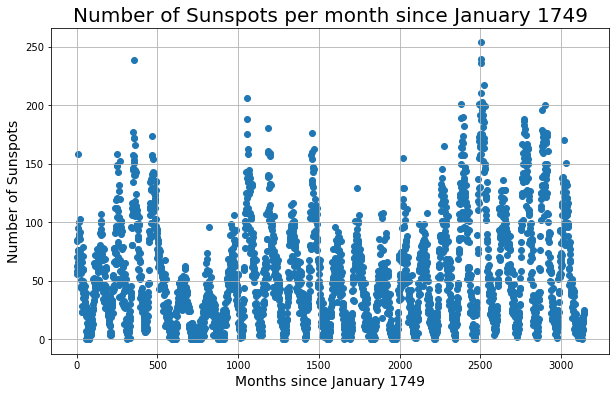

In [1]:
# loading the libraries 
import numpy as np
import matplotlib.pyplot as plt 

sunspots = np.loadtxt('sunspots.txt')

plt.figure(figsize = (10,6))
plt.scatter(sunspots[:,0],sunspots[:,1])
plt.title('Number of Sunspots per month since January 1749',fontsize = 20)
plt.xlabel('Months since January 1749',fontsize = 14)
plt.ylabel('Number of Sunspots',fontsize = 14)
plt.grid()
plt.show()

### b) Modify the program to only display the first five peaks in number of sunspots. Label both x and y and give the plot a title.

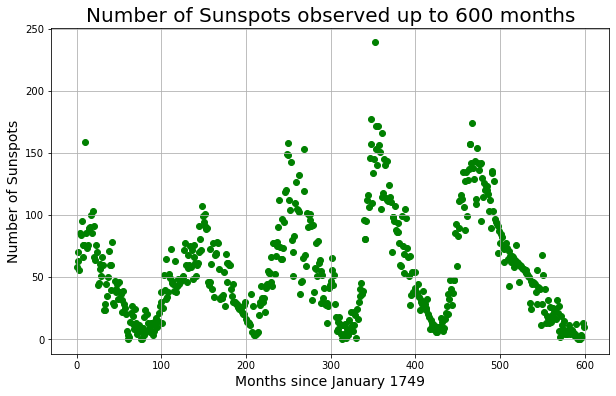

In [2]:
plt.figure(figsize = (10,6))
plt.scatter(sunspots[0:600,0],sunspots[0:600,1],color = 'g')
plt.title("Number of Sunspots observed up to 600 months",fontsize = 20)
plt.xlabel('Months since January 1749',fontsize = 14)
plt.ylabel("Number of Sunspots",fontsize = 14)
plt.grid()
plt.show()

### c) The data is very noisy due to small fluctuation of the values. We can smooth this out by computing a moving average defined by, make r =5 (the number of points to average over is 11), and plot both the original data and the running average on the same graph. Label both x and y and give the plot a title. Add a legend to the plot to denote the raw data and the running average.

$ Y_{k} = \frac{1}{2r} \sum_{m = -r}^{r} y_{k+m}$ 

In [3]:
### Complete a running average 

# The idea is that it takes a list, r value and calculates the running average 

ravg = []
win_add = 6
win_sub = 5 
for idx in range(0,600,1): # counts up to 600 points 
    if idx == 0: 
        ravg.append(np.average(sunspots[0:idx+win_add,1])) 
    elif idx == 1: 
        ravg.append(np.average(sunspots[idx-1:idx+win_add,1]))
    elif idx == 2: 
        ravg.append(np.average(sunspots[idx-2:idx+win_add,1]))
    elif idx == 3: 
        ravg.append(np.average(sunspots[idx-3:idx+win_add,1]))
    elif idx == 4: 
        ravg.append(np.average(sunspots[idx-4:idx+win_add,1]))
    elif idx == 596: 
        ravg.append(np.average(sunspots[idx-win_sub:idx+3,1]))
    elif idx == 597: 
        ravg.append(np.average(sunspots[idx-win_sub:idx+2,1]))
    elif idx == 598: 
        ravg.append(np.average(sunspots[idx-win_sub:idx+1,1]))
    elif idx == 599: 
        ravg.append(np.average(sunspots[idx-win_sub:idx,1]))
    else: 
        ravg.append(np.average(sunspots[idx-win_sub:idx+win_add,1]))

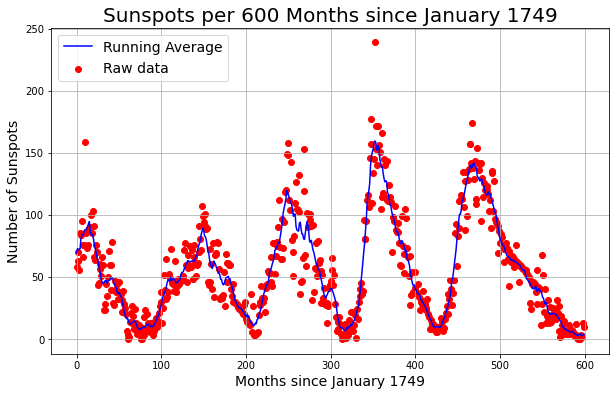

In [4]:
### graph running average over the regular sunspots data 

plt.figure(figsize = (10,6))
plt.scatter(sunspots[0:600,0],sunspots[0:600,1],color = 'r', label = 'Raw data')
plt.plot(sunspots[0:600,0],ravg,color = 'b',label = 'Running Average')
plt.title("Sunspots per 600 Months since January 1749",fontsize = 20)
plt.xlabel("Months since January 1749",fontsize = 14)
plt.ylabel('Number of Sunspots',fontsize =14)
plt.legend(loc='upper left',fontsize = 14)
plt.grid()
plt.show()

### This graph represents the raw data from the sunspots data file. Also, the running average of the sunspots data is overlayed over the raw data. 

# 2) Creating the 1D interference between two sine waves similar to what's shown in lecture, then follow the 2D interference example.

### a) Make wave 1 with f1 = 100 Hz, f2= 105Hz. These two waves on the same axis. Then add the two waves together on a separate axis.  Label both x and y and give the plot a title with a legend.

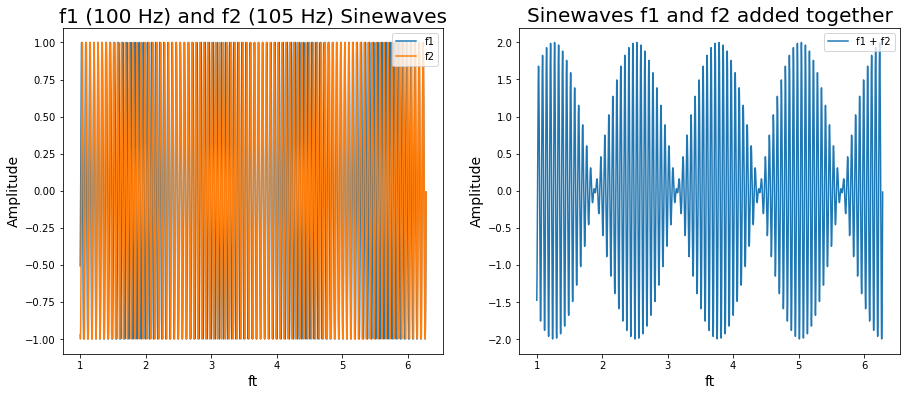

In [5]:
## question 2 

# a) 

t = np.arange(1,2 * np.pi,.0001)
#fig = plt.figure(figsize=(15,6))
fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (15,6))
f1 = np.sin(100 * t)
f2 = np.sin(105 * t)
# Add an axis 

f1plusf2 = f1 + f2 
ax[0].plot(t,f1,label = 'f1')
ax[0].plot(t,f2,label= 'f2')
ax[0].legend(loc = 'upper right')
ax[0].set_ylabel('Amplitude',fontsize = 14)
ax[0].set_xlabel('ft',fontsize = 14)
ax[0].set_title('f1 (100 Hz) and f2 (105 Hz) Sinewaves', fontsize = 20)
ax[1].plot(t,f1plusf2,label = 'f1 + f2')
ax[1].set_ylabel('Amplitude',fontsize = 14)
ax[1].set_xlabel('ft',fontsize = 14)
ax[1].set_title('Sinewaves f1 and f2 added together',fontsize = 20)
ax[1].legend(loc = 'upper right')

# add the labels 
plt.show()

### The left graph represents a sinewaves f1 (100 Hz) and f2 (105 Hz) plotted individually while the right graph represents the two sinewaves f1 and f2 added together into one big sinewave.   

### Follow Example 3.1 in the textbook to create the 2D interference plot. You can use the book's code as a reference but do not just copy it line by line. The CODE should be different!

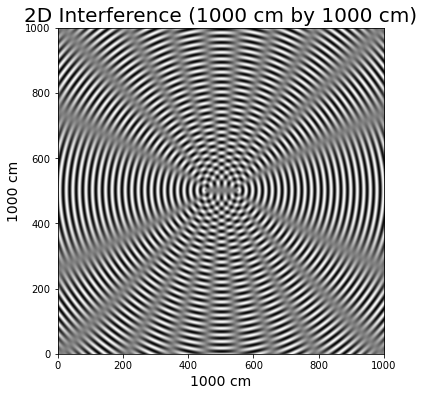

In [6]:
# b)  Create a 2D interference plot 
from math import sqrt, sin, pi 
from pylab import imshow,jet,gray,show 
import numpy as np 
import matplotlib.pyplot as plt 

# Instead of 1 m by 1 m plot, we can do 10 meter by 10 meter with 1000 points 
# Just like the example, we will have our length in terms of cm 

horizontal_side = 1000 # 1000 cm -> 10 m 
vertical_side = 1000 # 1000 cm -> 10 m 
numPoints= 1000 
SepBtwRocks = 100 # 100 cm 
hSpacing = horizontal_side/numPoints 
vSpacing = vertical_side/numPoints 

# This organizes where the two rocks will be dropped, but making sure that they are 100 cm away from each other 
x1 = horizontal_side/2 + SepBtwRocks/2 # This sets x1 at the center, but 50 cm in the x direction 
y1 = vertical_side/2 # This sets the y-coordinate = 0, where we define the middle of the axis 
x2 = horizontal_side/2 - SepBtwRocks/2 # This sets x1 at center, but 50 cm in the -x direction 
y2 = vertical_side/2 # This sets the y-coordinate = 0, where we define the middle of the axis 
# Now to loop through these points to create 2D interference 

def wavfunc(x,y,A,wavelength):
    k =2*pi/wavelength
    r1 = sqrt((x-x1)**2 + (y-y1)**2) 
    r2 = sqrt((x-x2)**2 + (y-y2)**2)
    waveEquation = A * (sin(k*r1) + sin(k*r2))
    return waveEquation 

# Now to loop through these points to create 2D interference 
arr = np.empty([numPoints,numPoints],float) 
for i in range(numPoints):
    y = vSpacing*i 
    for j in range(numPoints): 
        x = hSpacing * j 
        arr[i,j] = wavfunc(x,y,1,20)
        
# The actual plot
plt.figure(figsize=(8,6))
imshow(arr,origin='lower',extent = [0,horizontal_side,0,vertical_side])
plt.title('2D Interference (1000 cm by 1000 cm)',fontsize = 20)
plt.xlabel('1000 cm',fontsize = 14)
plt.ylabel('1000 cm',fontsize = 14)
gray()
# jet() # jet is not very good for this, it is very colorful and hard to distinguish different lines
show()

### This is 2D interference for when two pebbles were to be dropped in the pond at the same time about 100 cm from each other. This was done inside a 1000 cm by 1000 cm box. Something that should be noted is the amplitude of the waves were selected to be 1 cm and frequency = 20 Hz. When the frequency increased the image appeared to become smaller and as the amplitude increased the thickness of the crests/troughs became bigger. 

# 3) 

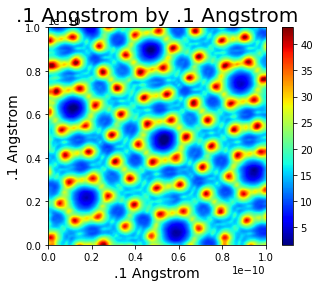

In [7]:
from pylab import imshow,jet,show,colorbar 
# Scanning tunneling microscope
# a) 
STM = np.loadtxt('stm.txt')
imshow(STM,origin="lower",extent = [0,1e-10,0,1e-10]) 
plt.title('.1 Angstrom by .1 Angstrom',fontsize = 20)
plt.xlabel('.1 Angstrom',fontsize = 14)
plt.ylabel('.1 Angstrom', fontsize = 14)
colorbar()
jet()
show()

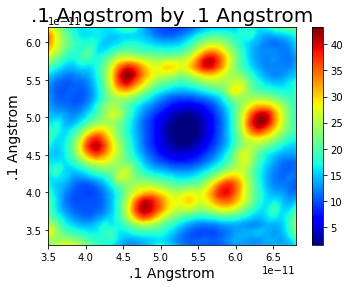

In [8]:
# b) 
from pylab import imshow, jet, show,xlim,ylim, colorbar
plt.imshow(STM,origin = 'lower',extent = [0,1e-10,0,1e-10])
xlim(.35e-10,.68e-10)
ylim(.33e-10,.62e-10)
plt.title('.1 Angstrom by .1 Angstrom',fontsize = 20)
plt.xlabel('.1 Angstrom',fontsize = 14)
plt.ylabel('.1 Angstrom',fontsize = 14)
jet()
colorbar()
show()

### This is the 3D screenshot, I captured and if you look at my zoomed in graph, they look exactly the same. Of course the degree of rotation is a little off, but nonetheless it matches the geometry. In conclusion, they are the same image. 

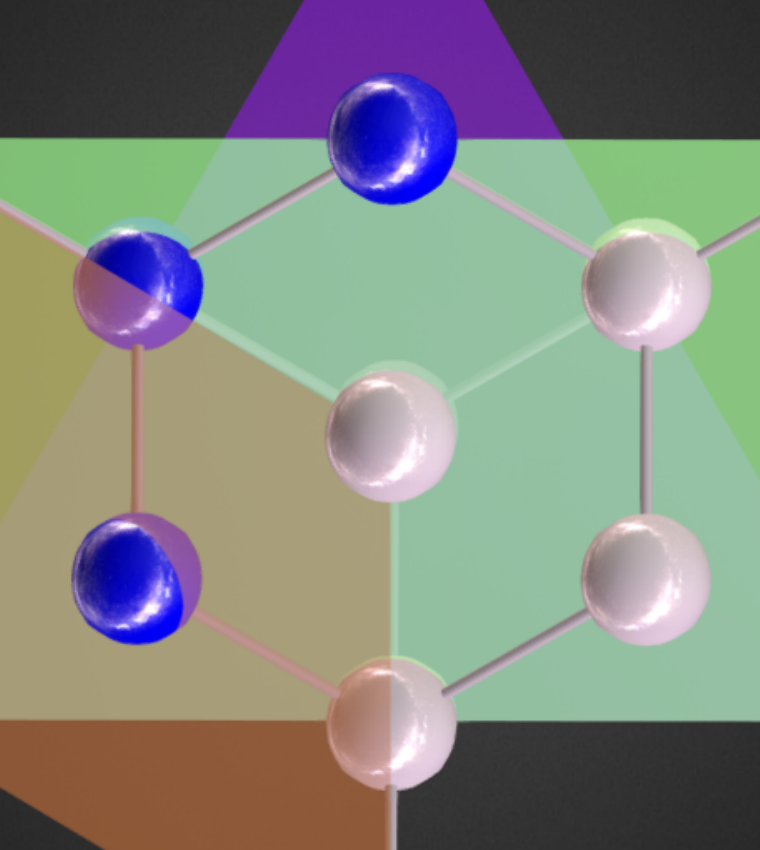

# 4) In the three data files here, code3data1.txt, code3data2.txt, code3data3.txt, it is often useful to make histogram of the data to get an overall view of the dataset. In all the histograms, make sure that there are enough bins to show the shape of the distributions but not so many that the histogram becomes "hairy", make sure to label axis and title as usual.

### a) Load code3data1.txt and use the plot function to plot the data at first. Then make a histogram instead. In the markdown, note what type of distribution is this data.

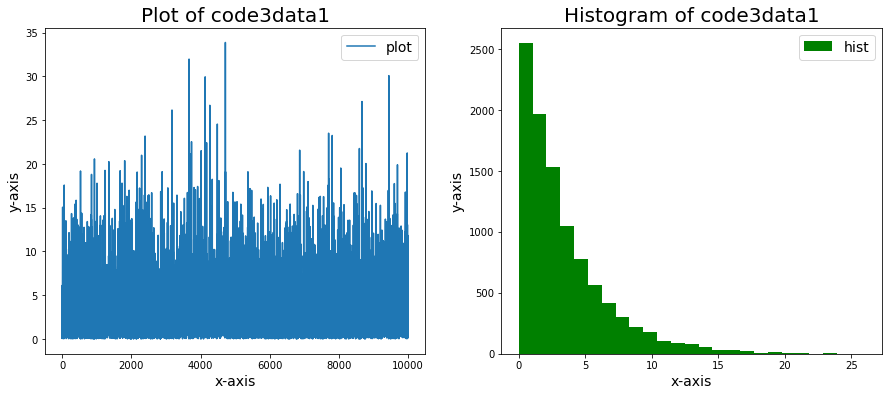

In [9]:
import matplotlib.pyplot as plt 
data1 = np.loadtxt("code3data1.txt")

fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (15,6))
ax[0].plot(data1,label = 'plot')
ax[0].set_xlabel('x-axis',fontsize = 14)
ax[0].set_ylabel('y-axis',fontsize = 14)
ax[0].set_title('Plot of code3data1',fontsize = 20)
ax[0].legend(loc = 'upper right',fontsize = 14)

ax[1].hist(data1,bins = 25,color = 'g',range = (0,26), label = 'hist')
ax[1].set_title('Histogram of code3data1',fontsize = 20)
ax[1].set_xlabel('x-axis',fontsize = 14)
ax[1].set_ylabel('y-axis',fontsize = 14)
ax[1].legend(loc = 'upper right',fontsize = 14)
plt.show()

### The left graph shows immediately why a histogram is useful because you can not see anything important from this plot. In the case of the histogram (right graph), you can actually see a distribution of the data which makes it easier to detect patterns. Looking at the histogram, it does not appear to be a gaussian distribution, because it typically has a huge peak in the middle and steadily declines in height from both sides. In fact, it seems to be a skewed distribution because it has a tail extending in the positive direction. A skewed distribution typically has a long tail pointing in either the positive or negative x axis. To clarify, the tail is caused by the small amounts of data and can be seen in the histogram as barely hovering the x-axis. This is what is called a tail.  By looking at our histogram, the tail points towards the positive x direction. Since we observe a tail in our histogram, it matches visual characteristics of a skewed distribution, so in conclusion this is a skewed distribution. 

### b) Load code3data2.txt and make a histogram. In the markdown below the plot, note the distribution type, estimate the parameters of this distribution from just looking at the histogram.

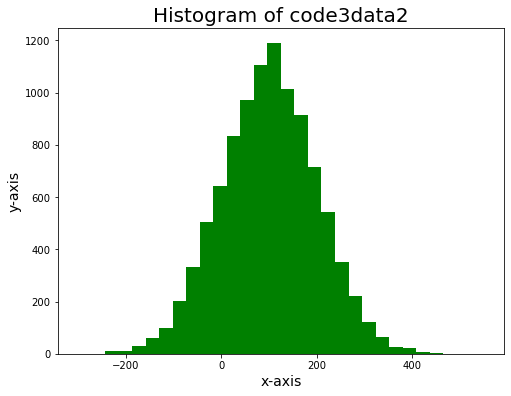

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
data2 = np.loadtxt("code3data2.txt")
plt.figure(figsize=(8,6))
plt.hist(data2,bins = 30,range = (-300,550),color = 'g')
plt.title("Histogram of code3data2",fontsize = 20)
plt.xlabel("x-axis",fontsize = 14)
plt.ylabel("y-axis",fontsize = 14)
plt.show()


# what does it mean by estimate the parameters? 

### By looking at this distribution, this is a gaussian distribution. A gaussian distribution always looks like this; key characteristics: both sides almost look entirely symmetrical or at the very least the data begins to decline steadily, causing this mountain look. As far as parameters go, it appears that the standard deviation runs between 0 and 200. 

### c) Load code3data3.txt, make a two-dimensional histogram this time. Figure out what distribution or shape would this histogram come from.

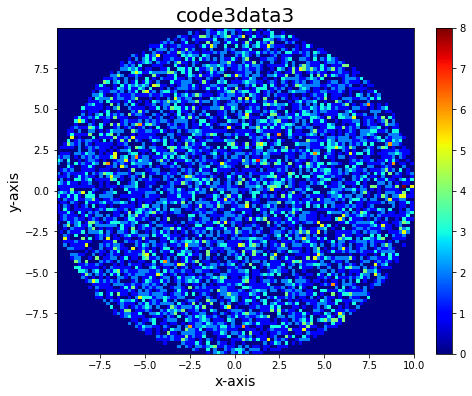

In [11]:
data3 = np.loadtxt("code3data3.txt")

plt.figure(figsize = (8,6))
plt.hist2d(data3[:,0],data3[:,1],bins = [100,100])
plt.title('code3data3',fontsize = 20)
plt.xlabel('x-axis',fontsize = 14)
plt.ylabel('y-axis',fontsize = 14)
plt.colorbar()
plt.jet()
plt.show()

### By looking at this 2D histogram, it looks like a circular pattern which suggests a bivariate normal distribution or a distribution with isotropic characteristics. An isotropic distribution means that the spread of data is the same in all direction, creating a circular or spherical shape in a histogram. So, it is hard to determine what distribution this is simply by looking at it, but my guess is that it conforms to a bivariate normal or isotropic distribution!  

# 5) The following data table shows data from the Millikan experiment which measured the photoelectric effect. 

| frequency (Hz) | voltage (V) | 
|----------------|-------------| 
| 5.4874e+14     | 0.5309      | 
| 6.931e+14      | 1.0842      | 
| 7.4307e+14     | 1.2734      | 
| 8.2193e+14     | 1.6598      | 
| 9.6074e+14     | 2.19856     | 
| 1.184e+15      | 3.10891     | 


### a) Create a 2D array for this dataset in your program. Then save it as a text file.

In [12]:
arr2D = np.array([[5.4874e14,.5309],[6.931e14,1.0842],[7.4307e14,1.2734],[8.2193e14,1.6598],[9.6074e14,2.19856],[1.184e15,3.10891]])
print('shape of array =',np.shape(arr2D))
# save arr2D as text file now 
savetextfile = np.savetxt('2Darr_MillikanExperiment',arr2D, delimiter = ' ')

shape of array = (6, 2)


### We were asked to create a 2D array in way so that it would contain the empirical data from Millikan's experiment. This was done right above. 

### b) Plot Voltage  vs Frequency ( this means Voltage on the vertical ). Label axes and title as usual.

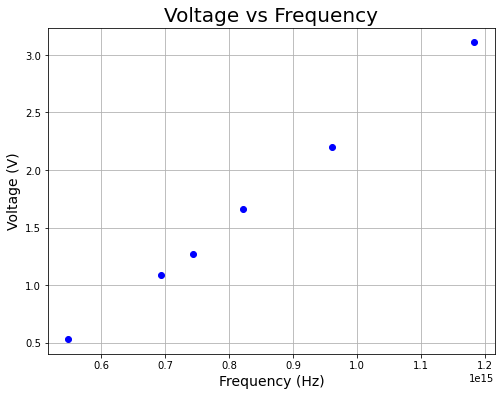

In [13]:
# loading in the 2D array 
Millikan_2D_arr = np.loadtxt('2Darr_MillikanExperiment')
x_comp = Millikan_2D_arr[:,0]
y_comp = Millikan_2D_arr[:,1]

plt.figure(figsize = (8,6))
plt.scatter(x_comp,y_comp,color= 'b')
plt.title('Voltage vs Frequency',fontsize = 20)
plt.ylabel('Voltage (V)',fontsize = 14)
plt.xlabel('Frequency (Hz)', fontsize = 14)
plt.grid()
plt.show()

### This is a scatter plot of the Millikan Data which represents the data collected when Millikan was testing the validity of Einstein's theory of the photoelectric effect. 

### c) Using markdown clip the image of the textbook for Problem 3.8 on page 122. Down to the equations to calculate m and c. Write a short summary of what this calculation does and what would be calculated from it.

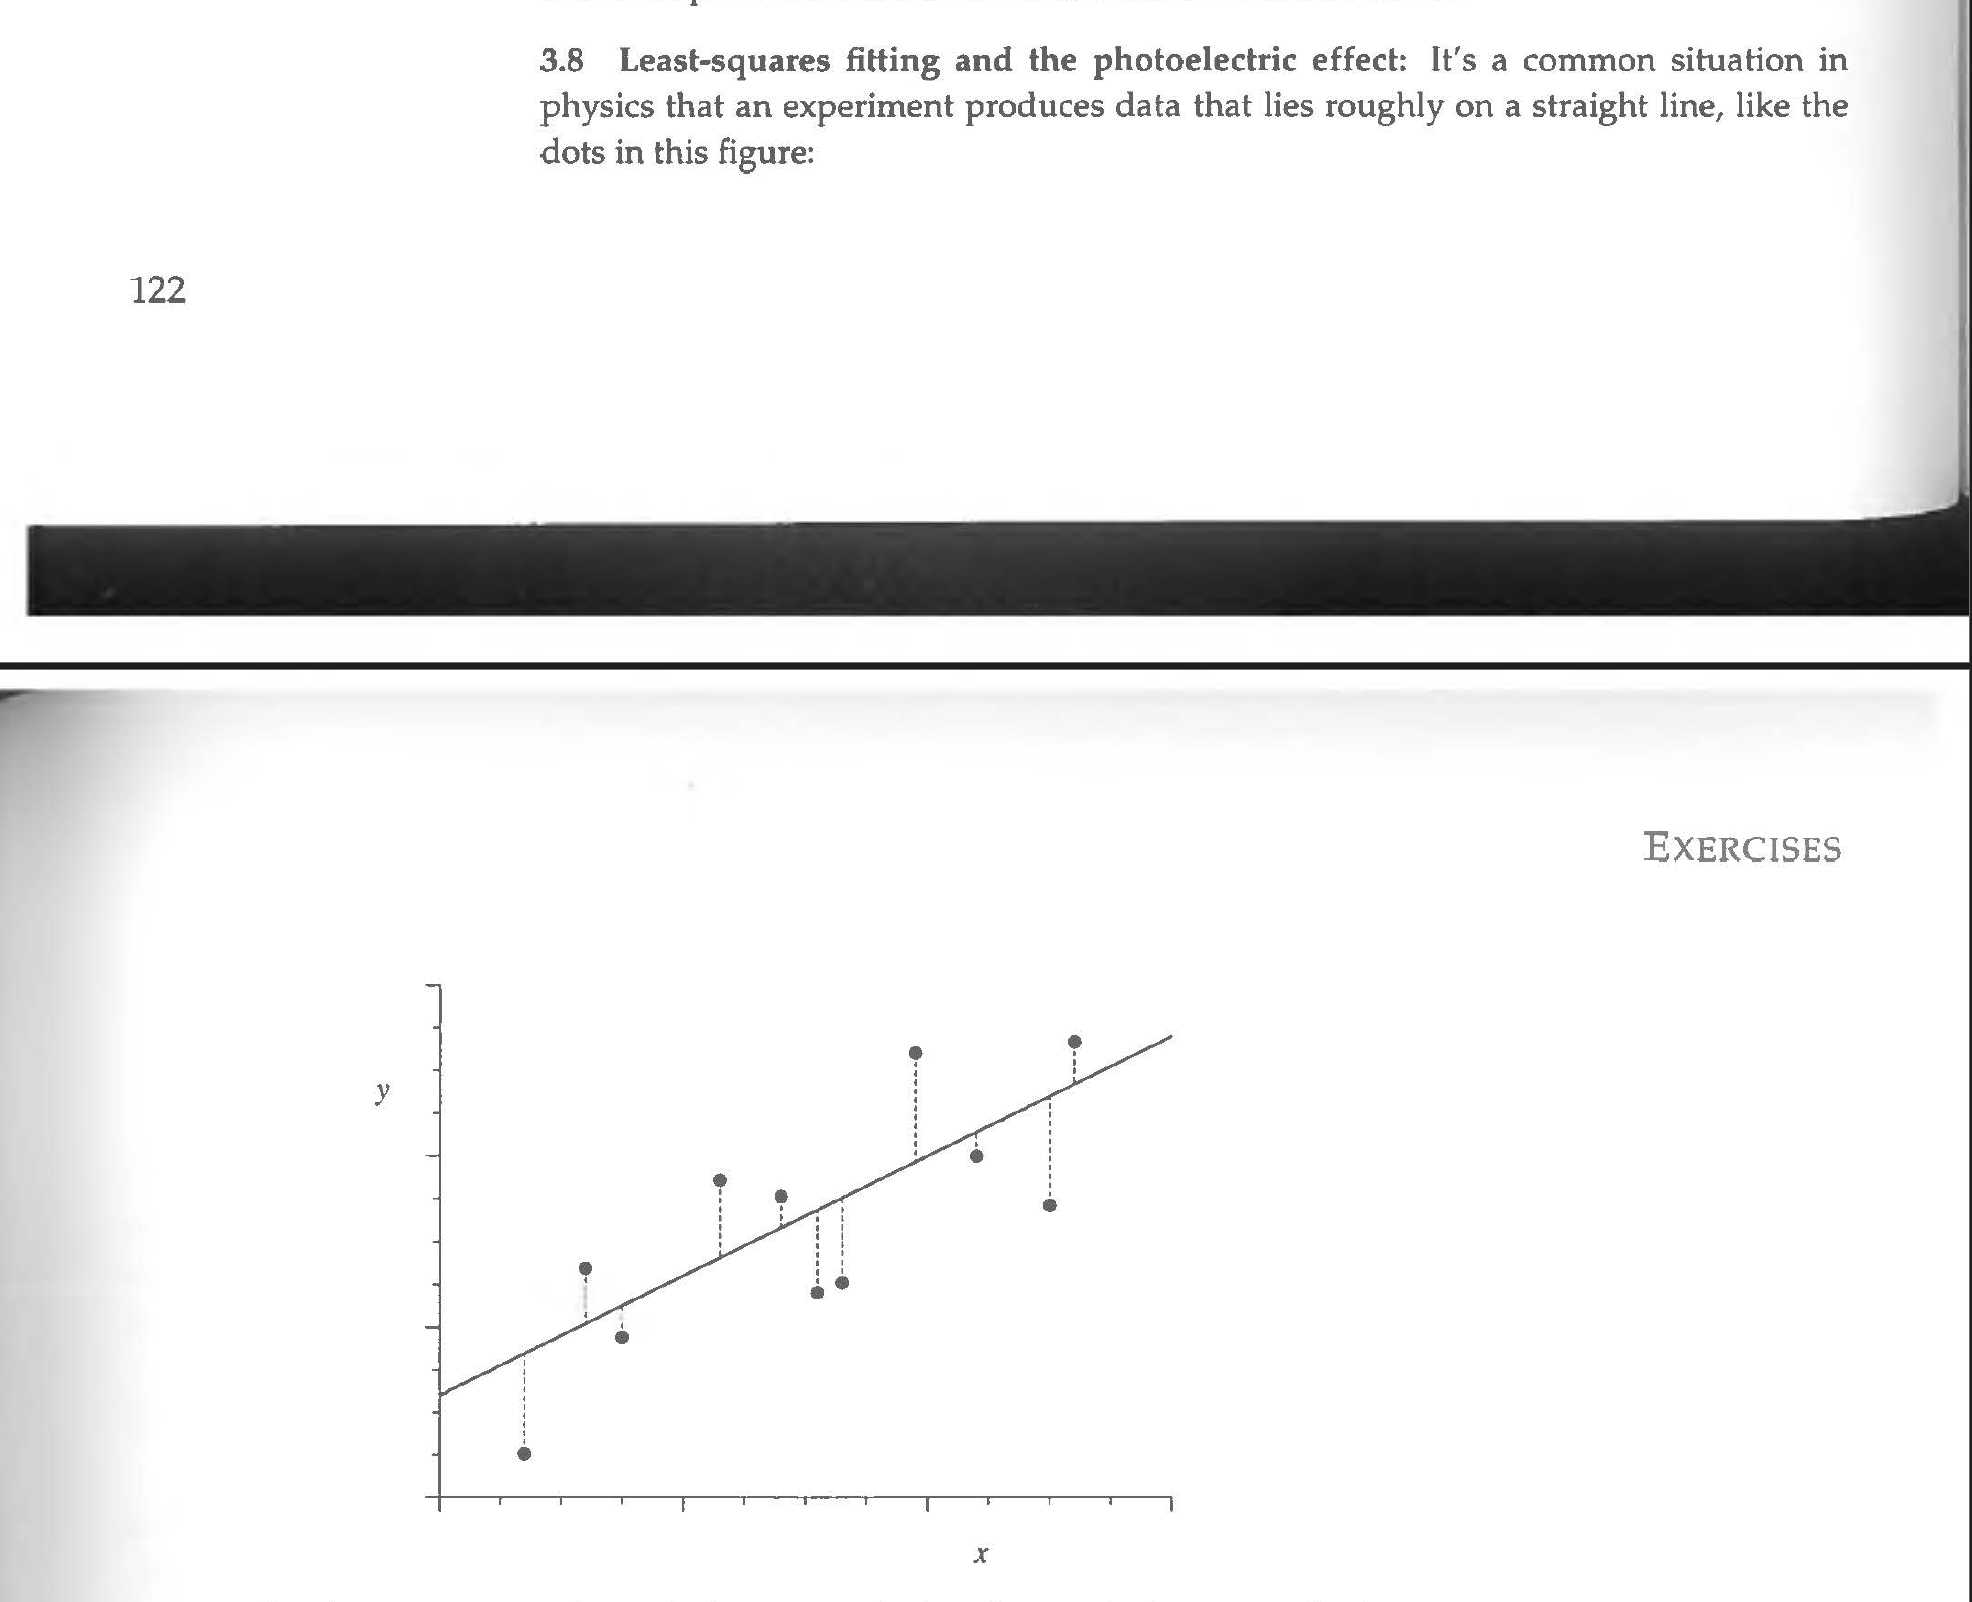
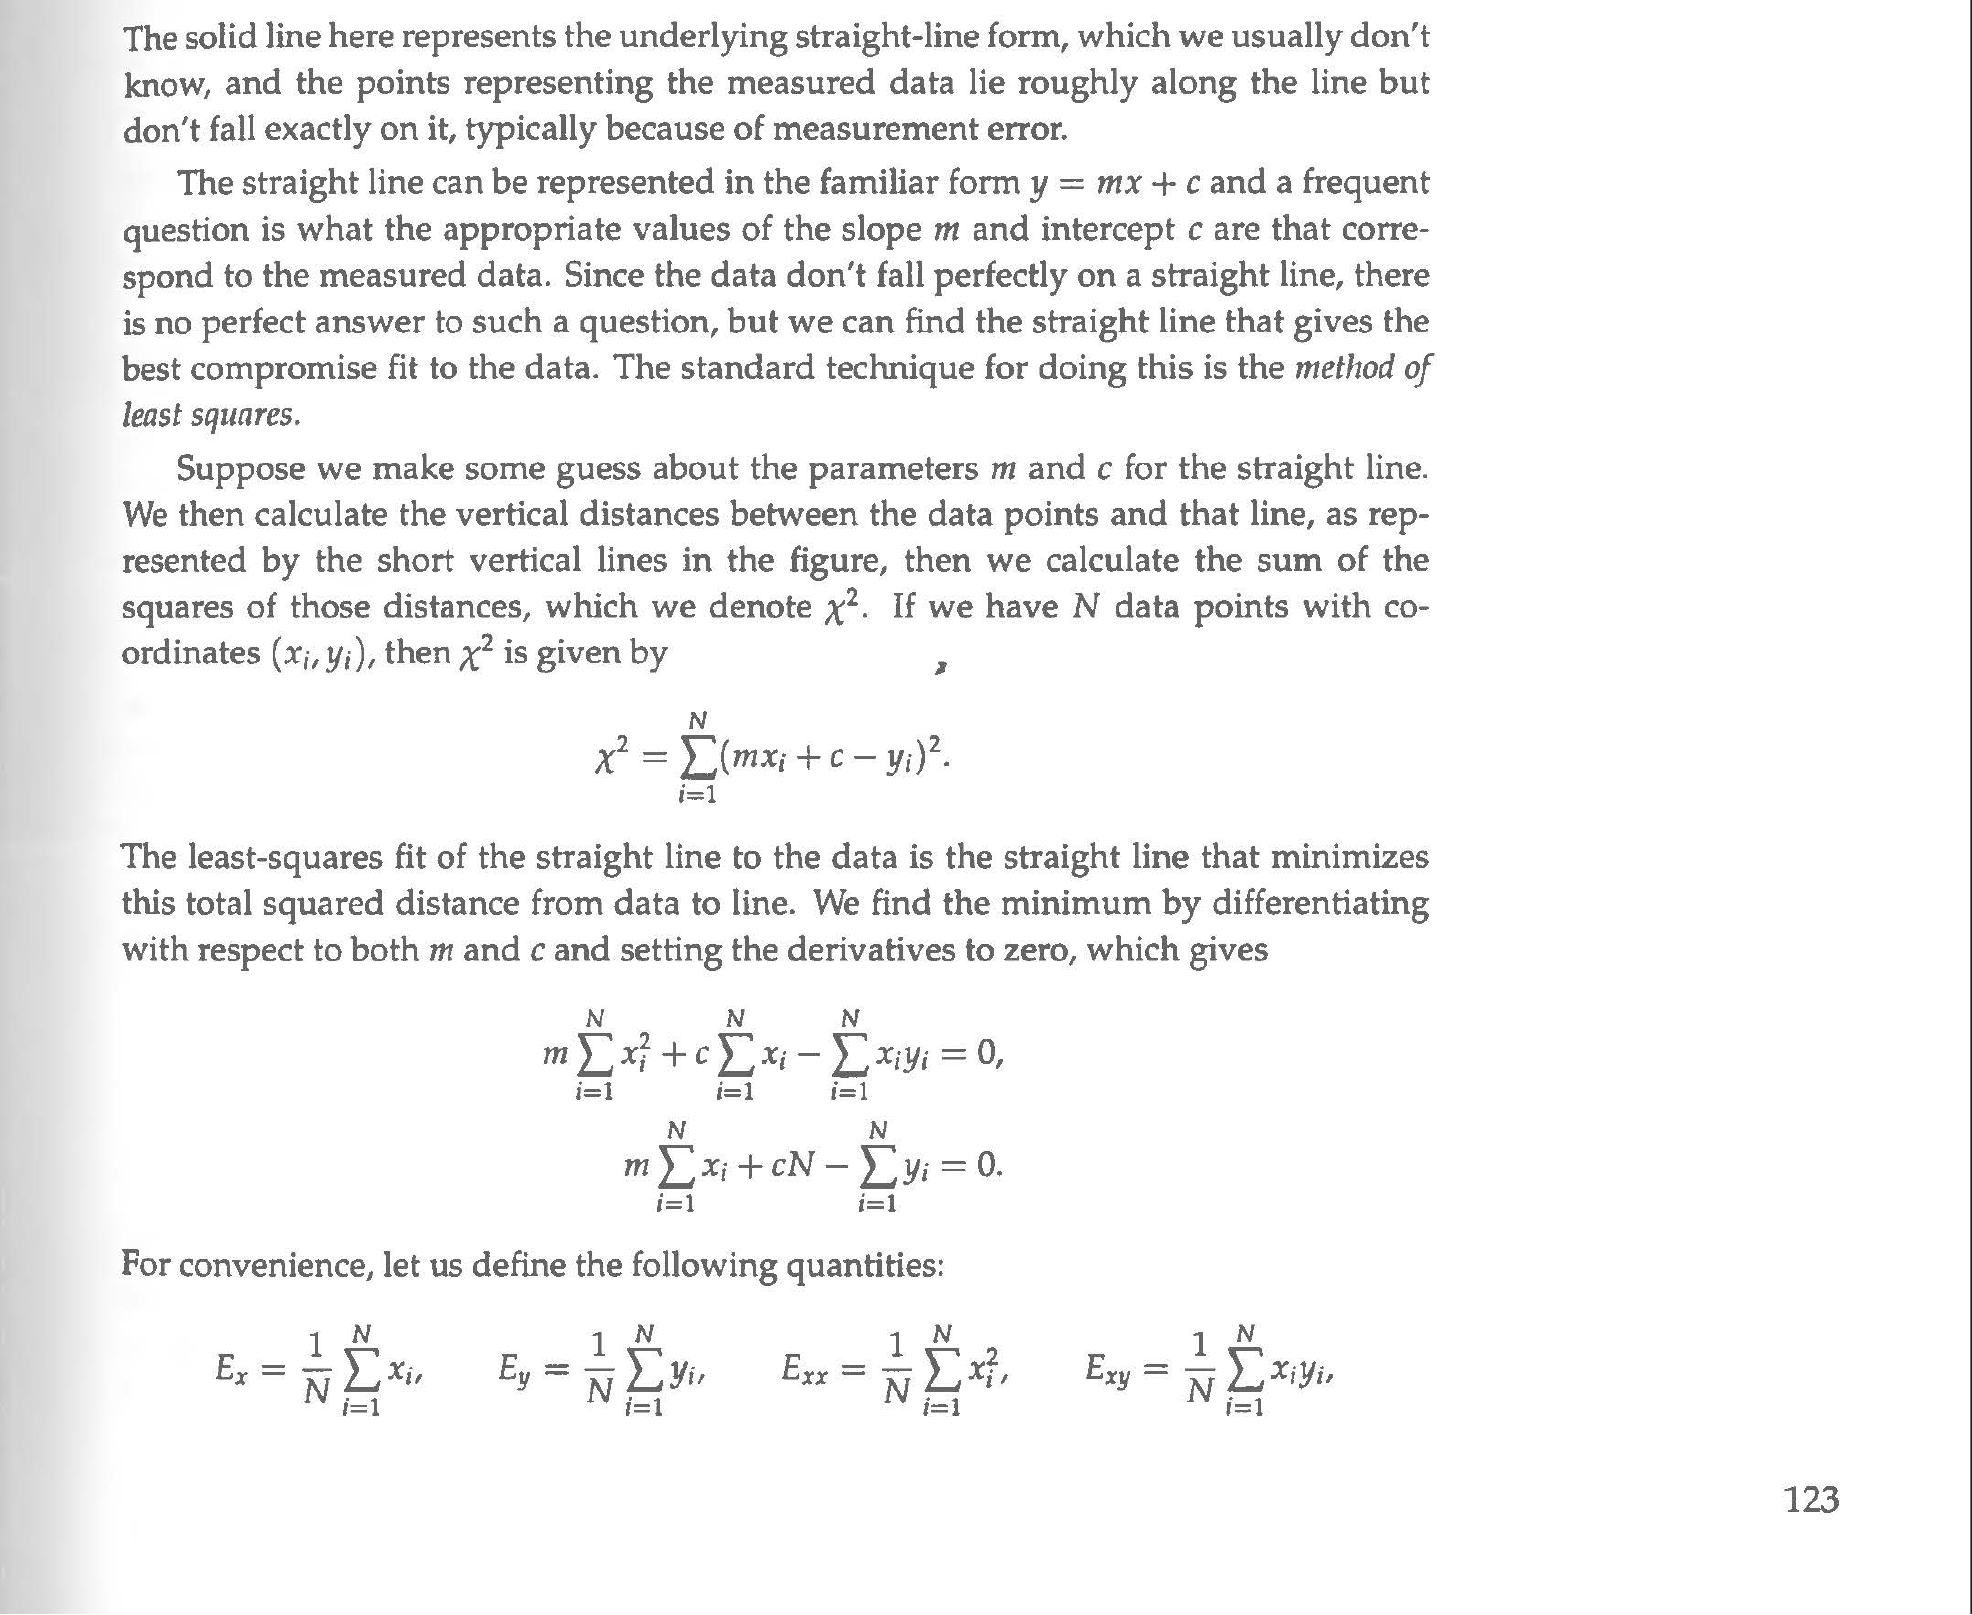
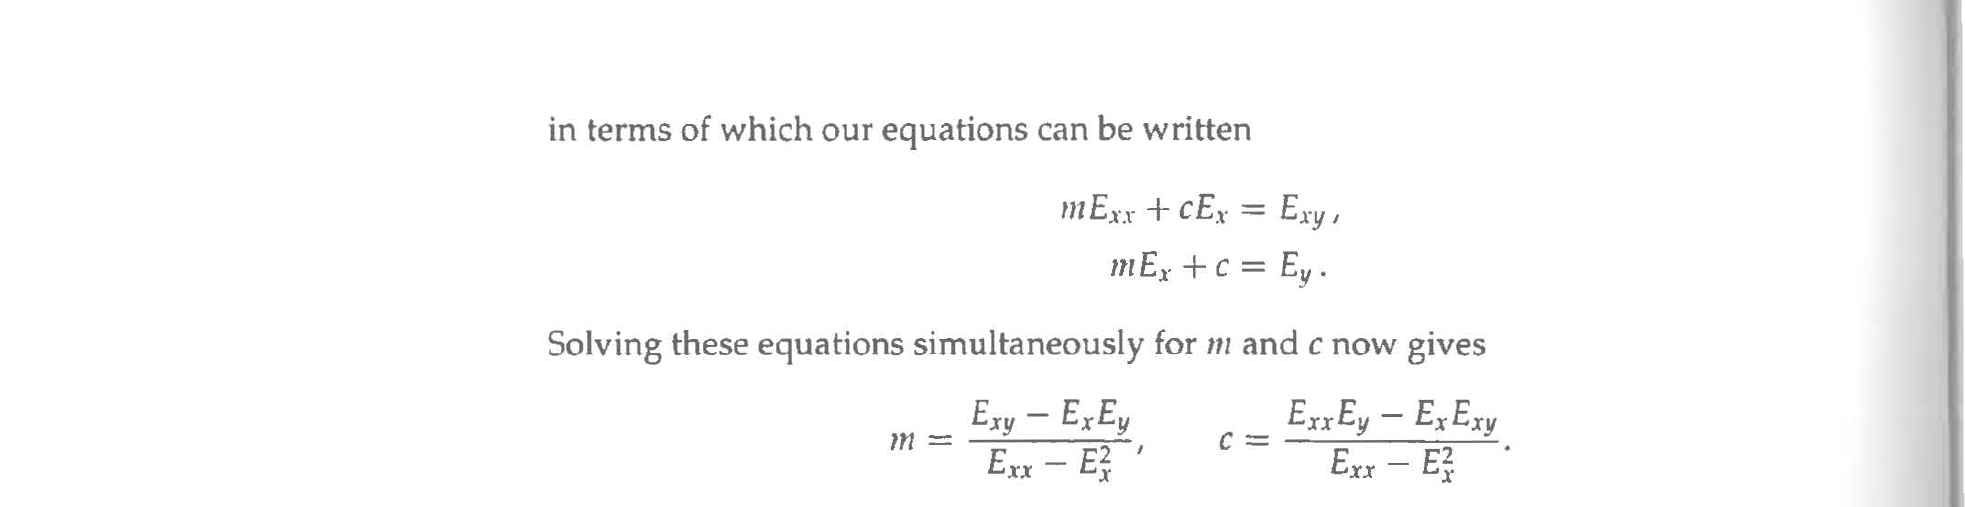

### Millikan is known most by his oil drop experiment that found the charge of an electron, then later allowed him to determine the mass of an electron. In 1905, Einstein had gained inspiration from Max Planck and began to think that light was quantized. This idea led him to take a monochromatic light and shine it on a metal plate. He found that when you shine light, that the photon may have enough energy to punch a conduction electron out of the surface. This discovery led to Einstein's theory of the photoelectric effect which he won the nobel prize in 1921. Millikan disapproved of Einstein's theory of the photoelectric, so much so he began a decade long experiment to test his theory. After this it turned out that the data collected and once plotted by hand, he was able to determine the unknown constant was Planck's constant. While at first Millikan was not pleased with this finding as he did not agree with it and was not on board with the idea of quantum mechanics. Ultimately, this finding later convinced him that Einstein was correct. This is to say that the slope m represents the finding of planck's constant and the slope intercept c is the work function. The work function is basically a measure of amount of energy is needed for photon to overcome when hitting the conduction electron in the material. If this work function is overcomed, then the photoelectric effect occurs, meaning the conduction electron shoots out of the metal plate. 

### Main idea is m = planck's constant and c = work function of material. The photoelectric effect depends on the frequency/wavelength of light and the type of metallic material. Each metal has its own unique work function. 

### d) Calculate m and c using the equations in the book and overlay the fit function you found on your plot from part B. Label axes, title and legend as usual.

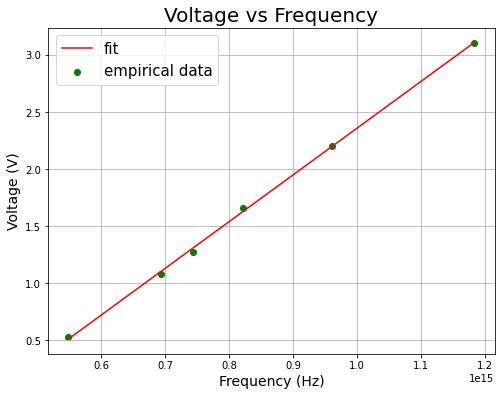

In [14]:
# Calculate m and c 

def calc(arr): 
    x = arr[:,0]
    y = arr[:,1]
    
    N = len(arr)
    E_x = sum(x)/N
    E_xx = sum(x**2)/N
    E_xy = sum(x*y)/N
    E_y = sum(y)/N
    m = (E_xy-E_x*E_y)/(E_xx-(E_x)**2)
    c = (E_xx*E_y - E_x*E_xy)/(E_xx-(E_x**2)) 
    
    return m,c
slope, yint = calc(Millikan_2D_arr)

def fit(x_val,m,c): 
    y_list = []
    for x in x_val: 
        y = m*x + c
        y_list.append(y)
        
    return y_list

y_vals = fit(x_comp,slope,yint)

plt.figure(figsize=(8,6))
plt.scatter(x_comp,y_comp,color= 'g',label = 'empirical data')
plt.plot(x_comp,y_vals,color = 'r',label = 'fit')
plt.title('Voltage vs Frequency',fontsize = 20)
plt.ylabel('Voltage (V)',fontsize = 14)
plt.xlabel('Frequency (Hz)', fontsize = 14)
plt.grid()
plt.legend(loc = "upper left",fontsize = 15)
plt.show()

### By determining the slope and y-intercept, I was able to run the Millikan data through my y = mx + c function. The formula's provided in the textbook gave up a way to calculate slope and y-intercept form. These results were more accurate than the empirical data provided by the Milikan text file. Therefore, by run the frequency values through my equation with our m and y-intercept known, we were able to plot and see that it fits pretty well. As you can see it is not perfect, but it is a decent fit as it matches the empirical data well. 

### e) Repeat this calculation using the scipy optimize curve_fit function instead. Overlay this other fit function on your plot also.

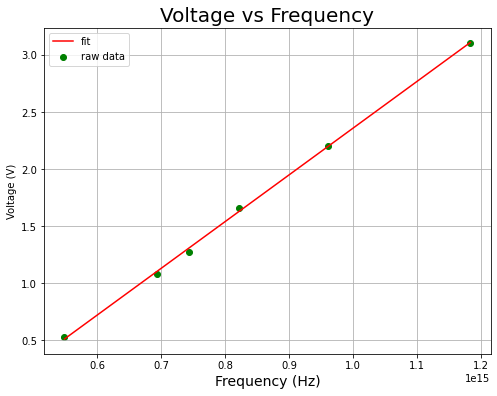

In [223]:
import scipy.optimize as optimize

def linFit (x,m,b): 
    y = m*x+b
    return y
# Scipy Optimize function 
linfit, linErr = optimize.curve_fit(linFit,x_comp,y_comp,p0 = [slope,yint])

 # y-values for optimized fit 
optimized_linfit = linFit(x_comp,linfit[0],linfit[1])

plt.figure(figsize = (8,6))
plt.scatter(x_comp,y_comp,label = 'raw data',color = 'g')
plt.plot(x_comp,optimized_linfit,'r',label='fit')
plt.title('Voltage vs Frequency',fontsize = 20)
plt.xlabel('Frequency (Hz)',fontsize = 14)
plt.ylabel('Voltage (V)')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

# 6) Exponential Fitting of Covid Data 

### a) Open the data file here and plot both Number of Cases and Number of Deaths from Covid as a function of number of days since March 4th 2020.

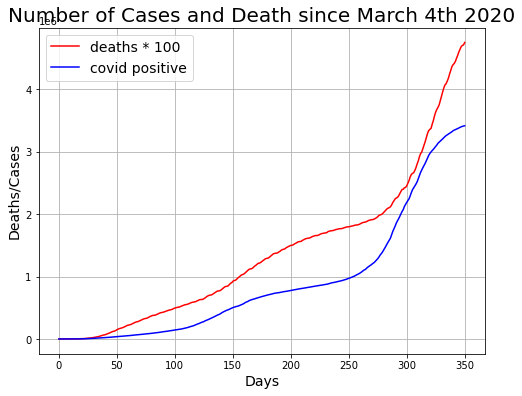

In [26]:
import pandas as pd 
# loading in data file 
df = pd.read_csv("CovidData.csv")
N = len(df['Date'])
days = np.arange(0,N)
deaths = np.flip(df['NDeaths'] * 100)
cPos = np.flip(df['NPositive'])

plt.figure(figsize = (8,6))
plt.plot(days,deaths,color = 'r',label = 'deaths * 100')
plt.plot(days,cPos,color = 'b',label = 'covid positive')
plt.title("Number of Cases and Death since March 4th 2020",fontsize = 20)
plt.ylabel('Deaths/Cases',fontsize = 14)
plt.xlabel('Days',fontsize = 14)
plt.legend(loc = 'upper left',fontsize = 14)
plt.grid()
plt.show()


### This is graph of the Covid cases and number of deaths since March 4th 2020. Since the number of cases is significantly more than the number of deaths, it is plausible to multiple the number of deaths to get it approximately on the same scale. 

### b) Make an exponential fit with errors to the data for the number of Deaths between 10 to 50 days and overlay the data and the fit together.

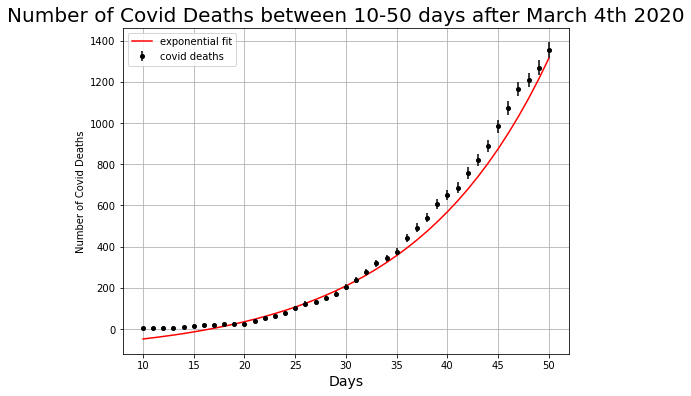

In [220]:
import scipy.optimize as optimize
days1 = range(10,51) # days 


# flip the data 
deaths40 = np.flip(np.array(df['NDeaths']))
errorofdeaths = np.sqrt(deaths40)
# exponential function that will be used to curve fit 
def ExFit(x,a,b,c): 
    return a + b*np.exp(c*x)

# Scipy Optimize function 
paramfit, paramErr = optimize.curve_fit(ExFit,days1,deaths40[9:50],p0=[75,5,.001])

# y-values for optimized fit 
optimized_fit = ExFit(numDays,paramfit[0],paramfit[1],paramfit[2])

plt.figure(figsize = (8,6))
#plt.scatter(days1,deaths40[9:50],label = 'deaths',color = 'k')
plt.errorbar(days1,deaths40[9:50],yerr=errorofdeaths[9:50],ls = '',
             ms='4',label = 'covid deaths',color = 'k',marker = 'o')
plt.plot(days1,optimized_fit,'r',label='exponential fit')
plt.title('Number of Covid Deaths between 10-50 days after March 4th 2020',fontsize = 20)
plt.xlabel('Days',fontsize = 14)
plt.ylabel('Number of Covid Deaths')
plt.legend()
plt.grid()
plt.show()

### Utilizing the Curve fit function, I fitted the curve for the number of covid deaths between 10-50 days after March 4th 2020. 

### c) Make an exponential fit with errors to the data for the number of Deaths between 250 to 300 days and overlay the data and the fit together.

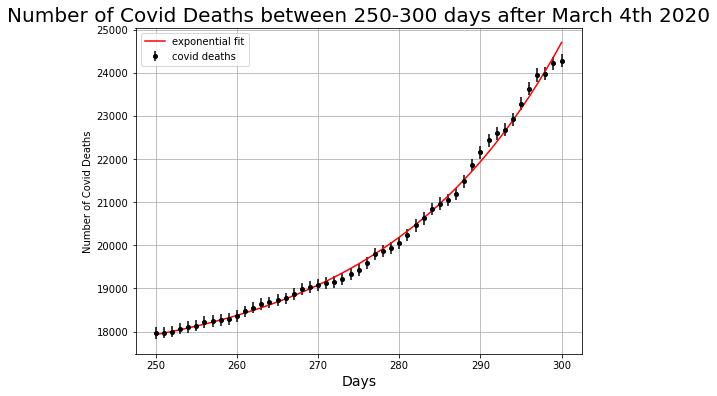

In [221]:
import scipy.optimize as optimize

days2 = range(250,301) # days 

# Scipy Optimize function 
paramfit2, paramErr2 = optimize.curve_fit(ExFit,days2,deaths40[249:300],p0=(10,70,.001))

# y-values for optimized fit 
optimized_fit2 = ExFit(days2,paramfit2[0],paramfit2[1],paramfit2[2])

plt.figure(figsize = (8,6))
#plt.scatter(days2,deaths40[249:300],label = 'deaths',color = 'k')
plt.errorbar(days2,deaths40[249:300],yerr=errorofdeaths[249:300],ls = '',
             ms='4',label = 'covid deaths',color = 'k',marker = 'o')
plt.plot(days2,optimized_fit2,'r',label='exponential fit')
plt.title('Number of Covid Deaths between 250-300 days after March 4th 2020',fontsize = 20)
plt.xlabel('Days',fontsize = 14)
plt.ylabel('Number of Covid Deaths')
plt.legend()
plt.grid()
plt.show()

### Using the scipy optimization curve fit function, I fitted the the Number of Covid Deaths between 250 - 300 days. 

### d) Plot all the data with the two fits you found in part b and c. You can use linewidth=5 in your plot function to thicken the fit function to make them show up above the data.

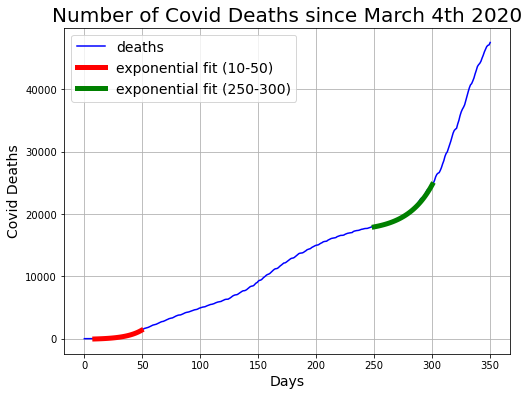

In [198]:
plt.figure(figsize = (8,6))
plt.plot(days,deaths40,color = 'b',label = 'deaths') # Note this should be deaths40, do not need to shift by 2 orders magnitude like in part a 
plt.plot(numDays,optimized_fit,'r',label='exponential fit (10-50)',linewidth = '5')
plt.plot(numDays2,optimized_fit2,'g',label = 'exponential fit (250-300)',linewidth = '5')
plt.title("Number of Covid Deaths since March 4th 2020",fontsize = 20)
plt.ylabel('Covid Deaths',fontsize = 14)
plt.xlabel('Days',fontsize = 14)
plt.legend(loc = 'upper left',fontsize = 14)
plt.grid()
plt.show()

### This graph represents all the covid deaths that occurred from 0-350 days, after March 4th 2020. The red line represents the curve fit that I did in part b while the green fit represents the curve fit from part c. By looking at the graph it appears that the curve fits fit pretty well. 